In [6]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
import itertools
import matplotlib.gridspec as gridspec

import os
import sys
# 数据在Anaconda路径中；Jupyter代码在IDEA路径中；导入的自定义库是Anaconda路径中的库。 
# os.chdir设置之后，os.path也会变为该路径
os.chdir(r"E:\Anaconda\Anaconda_code\101_Sklearn\7_SVM")
print(os.getcwd())

from math import isnan
import FeatureTools as ft
import Tools_customize as tc
import Binning_tools as bt
from sqlalchemy import create_engine

E:\Anaconda\Anaconda_code\101_Sklearn\7_SVM


In [7]:
# i.meituan.com
# 一、表读取
sql = "select * from bar_view"
bar_data = ft.read_from_mysql(sql, "root", "root", "127.0.0.1", "3306", "meituan_bar")

In [8]:
mis_val_table_ren_columns = ft.missing_values_table(bar_data)

Your selected dataframe has 33 columns.
There are 20 columns that have missing values.


In [9]:
bar_data['bar_phone'] = bar_data['bar_phone'].map(lambda x: np.nan if not x else x)
bar_data['bar_address'] = bar_data['bar_address'].map(lambda x: np.nan if not x else x)
bar_data['tuan'] = bar_data['tuan'].map(lambda x: np.nan if not x else x)
bar_data['juan'] = bar_data['juan'].map(lambda x: np.nan if not x else x)
bar_data['wai'] = bar_data['wai'].map(lambda x: np.nan if not x else x)

bar_data['package_id'] = bar_data['package_id'].map(lambda x: np.nan if not x else x)
bar_data['package_name'] = bar_data['package_name'].map(lambda x: np.nan if not x else x)

bar_data['package_unit'] = bar_data['package_unit'].map(lambda x: np.nan if not x else x)
bar_data['activity'] = bar_data['activity'].map(lambda x: np.nan if not x else x)

bar_data['sales_time_period'] = bar_data['sales_time_period'].map(lambda x: np.nan if not x else x)
bar_data['effective_start_date'] = bar_data['effective_start_date'].map(lambda x: np.nan if not x else x)
bar_data['effective_end_date'] = bar_data['effective_end_date'].map(lambda x: np.nan if not x else x)
bar_data['package_title'] = bar_data['package_title'].map(lambda x: np.nan if not x else x)
bar_data['package_rule'] = bar_data['package_rule'].map(lambda x: np.nan if not x else x)

bar_data['item_name'] = bar_data['item_name'].map(lambda x: np.nan if not x else x)
bar_data['item_unit'] = bar_data['item_unit'].map(lambda x: np.nan if not x else x)
bar_data['item_rule'] = bar_data['item_rule'].map(lambda x: np.nan if not x else x)
bar_data['package_update_time'] = bar_data['package_update_time'].map(lambda x: np.nan if not x else x)

In [10]:
bar_data['sales_time_period'] = bar_data['sales_time_period'].map(lambda x: int(x[4:]) if x is not np.nan else x)

In [11]:
sns.set(font='SimHei', font_scale=1.3)

Text(0.5, 1.0, '不同酒吧评分')

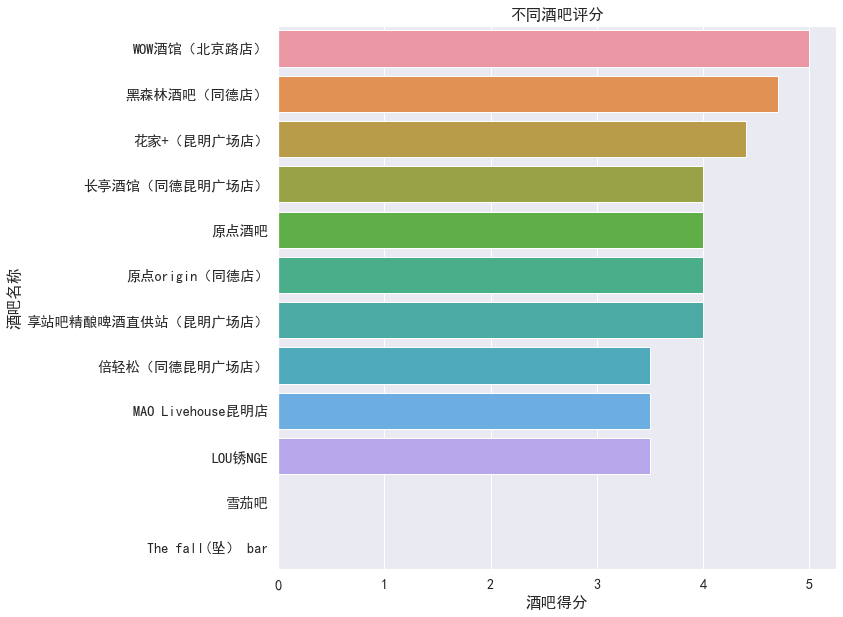

In [13]:
# 1、不同酒吧评分
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.barplot(x='bar_score',y='bar_name',data =bar_data, ax=ax, ci=None)
ax.set_xlabel("酒吧得分")
ax.set_ylabel("酒吧名称")
ax.set_title("不同酒吧评分")


In [14]:
bar_group_max = bar_data.groupby(["bar_name", "package_name"], as_index=False)[['package_price','sales_time_period']].max()

Text(0.5, 1.0, '不同酒吧套餐总价')

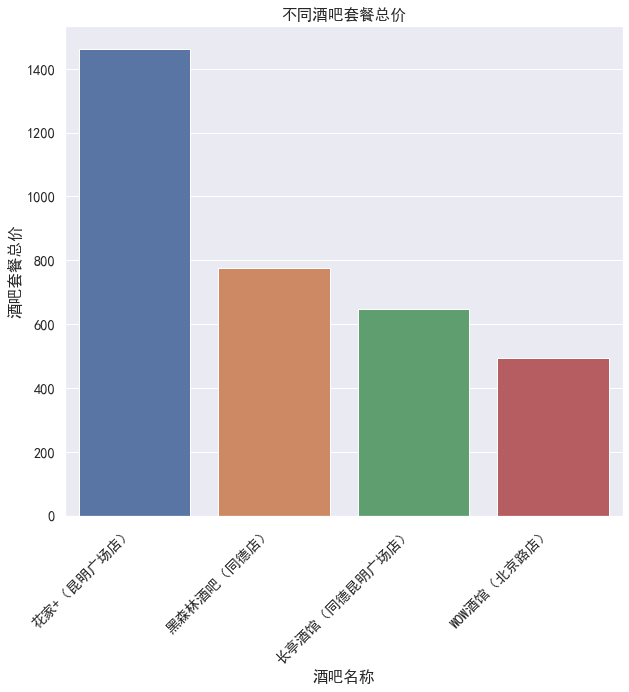

In [16]:
# 2、不同酒吧套餐总价
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.barplot(x='bar_name', y='package_price', data =bar_group_max, ax=ax, ci=None, estimator=sum,
           order=bar_group_max.groupby("bar_name")['package_price'].sum().sort_values(ascending=False).index
           )
fig.autofmt_xdate(rotation = 45)
ax.set_xlabel("酒吧名称")
ax.set_ylabel("酒吧套餐总价")
ax.set_title("不同酒吧套餐总价")


Text(0.5, 1.0, 'WOW酒馆（北京路店）酒吧套餐类别价格')

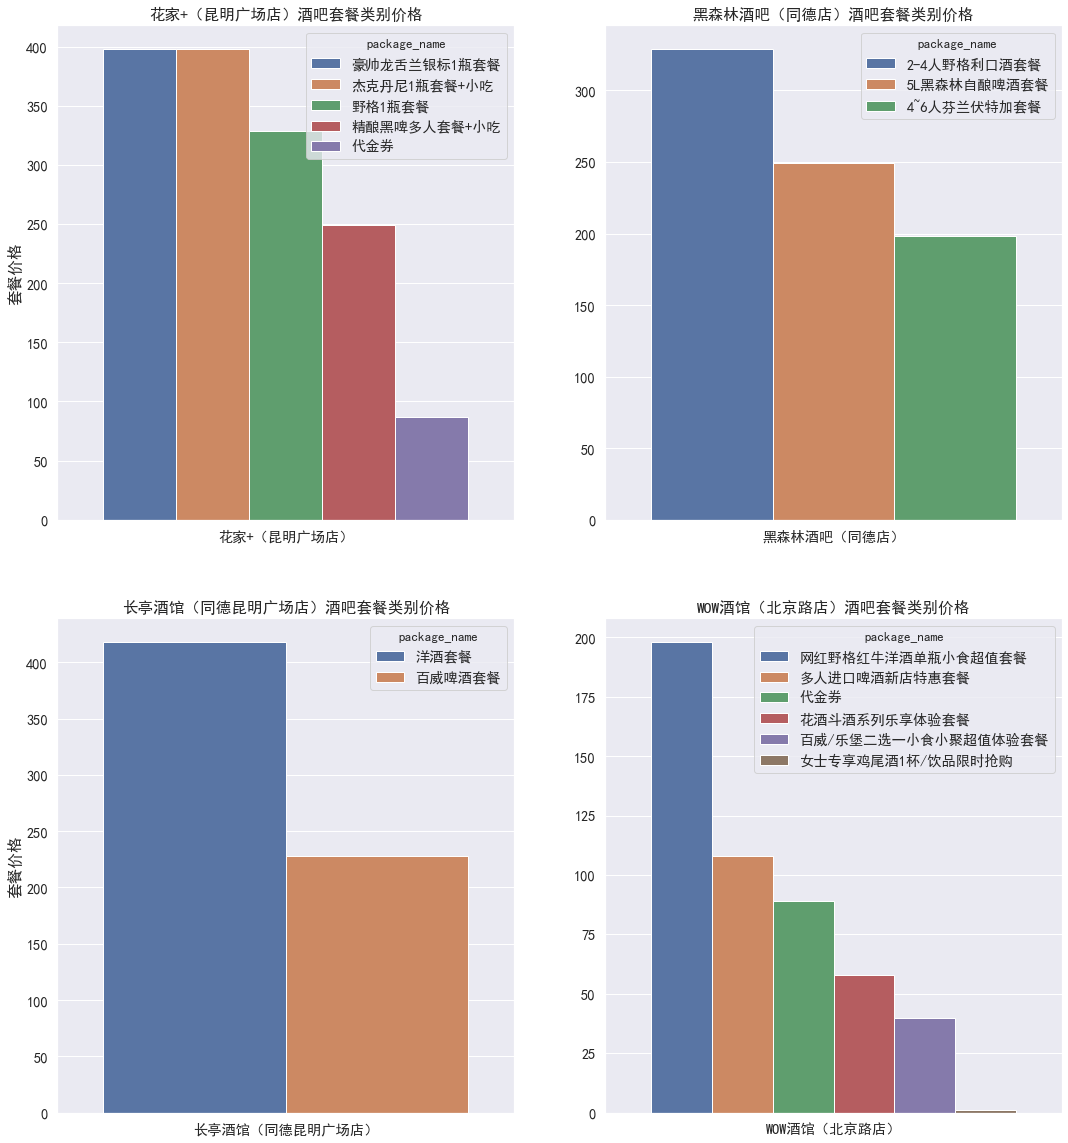

In [17]:
# 3、酒吧套餐类别
fig, ax = plt.subplots(2,2,figsize=(18,20))
sns.barplot(x='bar_name', y='package_price', hue='package_name' ,data=bar_group_max[bar_group_max['bar_name']=='花家+（昆明广场店）'], ax=ax[0][0], ci=None, estimator=sum,
            hue_order=bar_group_max[bar_group_max['bar_name']=='花家+（昆明广场店）'].groupby("package_name")['package_price'].sum().sort_values(ascending=False).index
           )
ax[0][0].set_xlabel("")
ax[0][0].set_ylabel("套餐价格")
ax[0][0].set_title("花家+（昆明广场店）酒吧套餐类别价格")

sns.barplot(x='bar_name', y='package_price', hue='package_name' ,data=bar_group_max[bar_group_max['bar_name']=='黑森林酒吧（同德店）'], ax=ax[0][1], ci=None, estimator=sum,
            hue_order=bar_group_max[bar_group_max['bar_name']=='黑森林酒吧（同德店）'].groupby("package_name")['package_price'].sum().sort_values(ascending=False).index
           )
ax[0][1].set_xlabel("")
ax[0][1].set_ylabel("")
ax[0][1].set_title("黑森林酒吧（同德店）酒吧套餐类别价格")

sns.barplot(x='bar_name', y='package_price', hue='package_name' ,data=bar_group_max[bar_group_max['bar_name']=='长亭酒馆（同德昆明广场店）'], ax=ax[1][0], ci=None, estimator=sum,
            hue_order=bar_group_max[bar_group_max['bar_name']=='长亭酒馆（同德昆明广场店）'].groupby("package_name")['package_price'].sum().sort_values(ascending=False).index
           )
#fig.autofmt_xdate(rotation = 45)
ax[1][0].set_xlabel("")
ax[1][0].set_ylabel("套餐价格")
ax[1][0].set_title("长亭酒馆（同德昆明广场店）酒吧套餐类别价格")

sns.barplot(x='bar_name', y='package_price', hue='package_name' ,data=bar_group_max[bar_group_max['bar_name']=='WOW酒馆（北京路店）'], ax=ax[1][1], ci=None, estimator=sum,
            hue_order=bar_group_max[bar_group_max['bar_name']=='WOW酒馆（北京路店）'].groupby("package_name")['package_price'].sum().sort_values(ascending=False).index
           )
#fig.autofmt_xdate(rotation = 45)
ax[1][1].set_xlabel("")
ax[1][1].set_ylabel("")
ax[1][1].set_title("WOW酒馆（北京路店）酒吧套餐类别价格")


Text(0.5, 1.0, 'WOW酒馆（北京路店）酒吧半年内套餐类别销量')

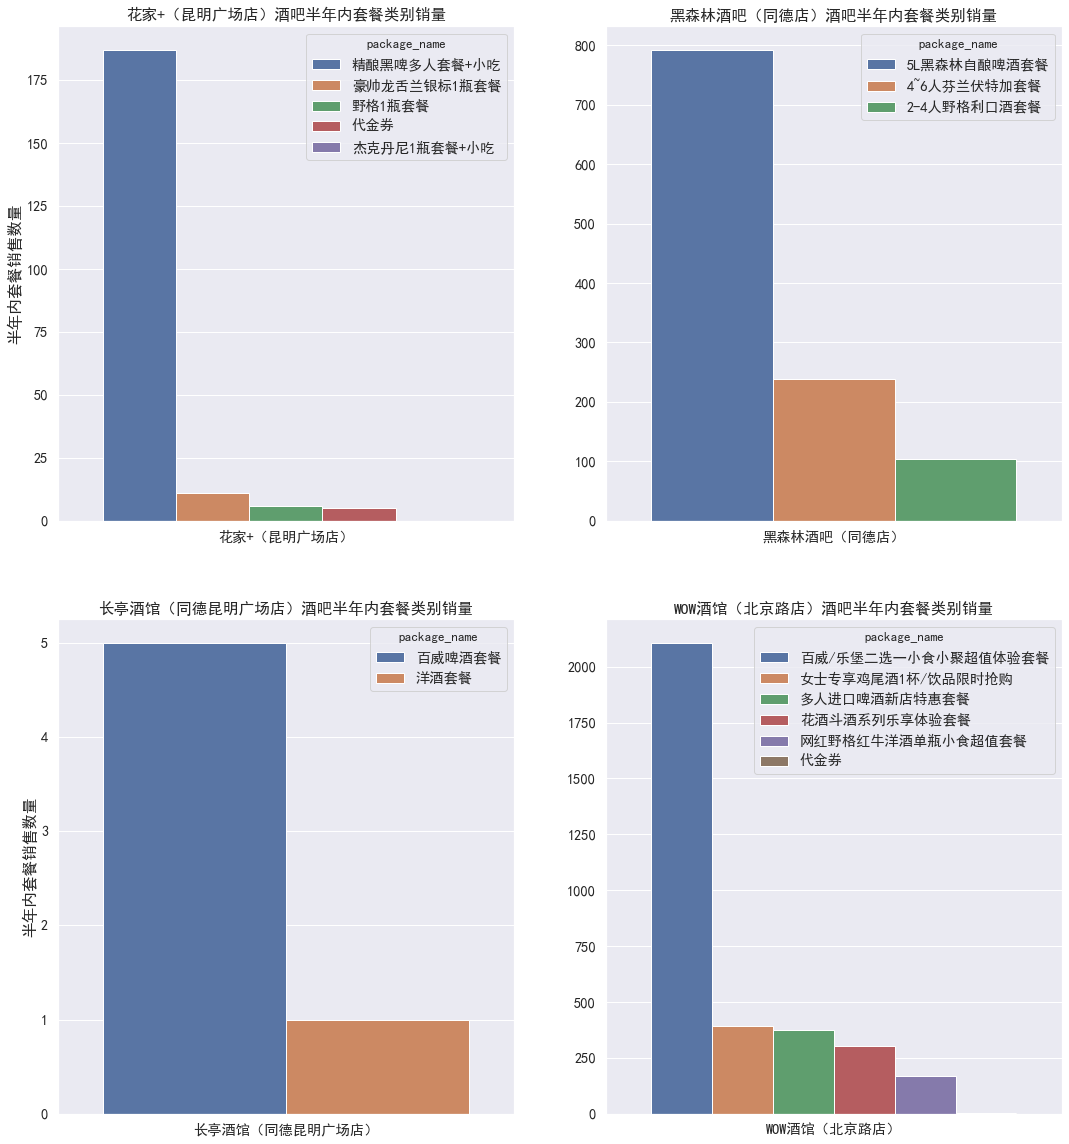

In [18]:
# 4、酒吧套餐销售数量
fig, ax = plt.subplots(2,2,figsize=(18,20))
sns.barplot(x='bar_name', y='sales_time_period', hue='package_name' ,data=bar_group_max[bar_group_max['bar_name']=='花家+（昆明广场店）'], ax=ax[0][0], ci=None, estimator=sum,
            hue_order=bar_group_max[bar_group_max['bar_name']=='花家+（昆明广场店）'].groupby("package_name")['sales_time_period'].sum().sort_values(ascending=False).index
           )
ax[0][0].set_xlabel("")
ax[0][0].set_ylabel("半年内套餐销售数量")
ax[0][0].set_title("花家+（昆明广场店）酒吧半年内套餐类别销量")


sns.barplot(x='bar_name', y='sales_time_period', hue='package_name' ,data=bar_group_max[bar_group_max['bar_name']=='黑森林酒吧（同德店）'], ax=ax[0][1], ci=None, estimator=sum,
            hue_order=bar_group_max[bar_group_max['bar_name']=='黑森林酒吧（同德店）'].groupby("package_name")['sales_time_period'].sum().sort_values(ascending=False).index
           )
ax[0][1].set_xlabel("")
ax[0][1].set_ylabel("")
ax[0][1].set_title("黑森林酒吧（同德店）酒吧半年内套餐类别销量")


sns.barplot(x='bar_name', y='sales_time_period', hue='package_name' ,data=bar_group_max[bar_group_max['bar_name']=='长亭酒馆（同德昆明广场店）'], ax=ax[1][0], ci=None, estimator=sum,
            hue_order=bar_group_max[bar_group_max['bar_name']=='长亭酒馆（同德昆明广场店）'].groupby("package_name")['sales_time_period'].sum().sort_values(ascending=False).index
           )
#fig.autofmt_xdate(rotation = 45)
ax[1][0].set_xlabel("")
ax[1][0].set_ylabel("半年内套餐销售数量")
ax[1][0].set_title("长亭酒馆（同德昆明广场店）酒吧半年内套餐类别销量")


sns.barplot(x='bar_name', y='sales_time_period', hue='package_name' ,data=bar_group_max[bar_group_max['bar_name']=='WOW酒馆（北京路店）'], ax=ax[1][1], ci=None, estimator=sum,
            hue_order=bar_group_max[bar_group_max['bar_name']=='WOW酒馆（北京路店）'].groupby("package_name")['sales_time_period'].sum().sort_values(ascending=False).index
           )
#fig.autofmt_xdate(rotation = 45)
ax[1][1].set_xlabel("")
ax[1][1].set_ylabel("")
ax[1][1].set_title("WOW酒馆（北京路店）酒吧半年内套餐类别销量")


Text(0.5, 1.0, 'WOW酒馆（北京路店）酒吧套餐限时抢购价格')

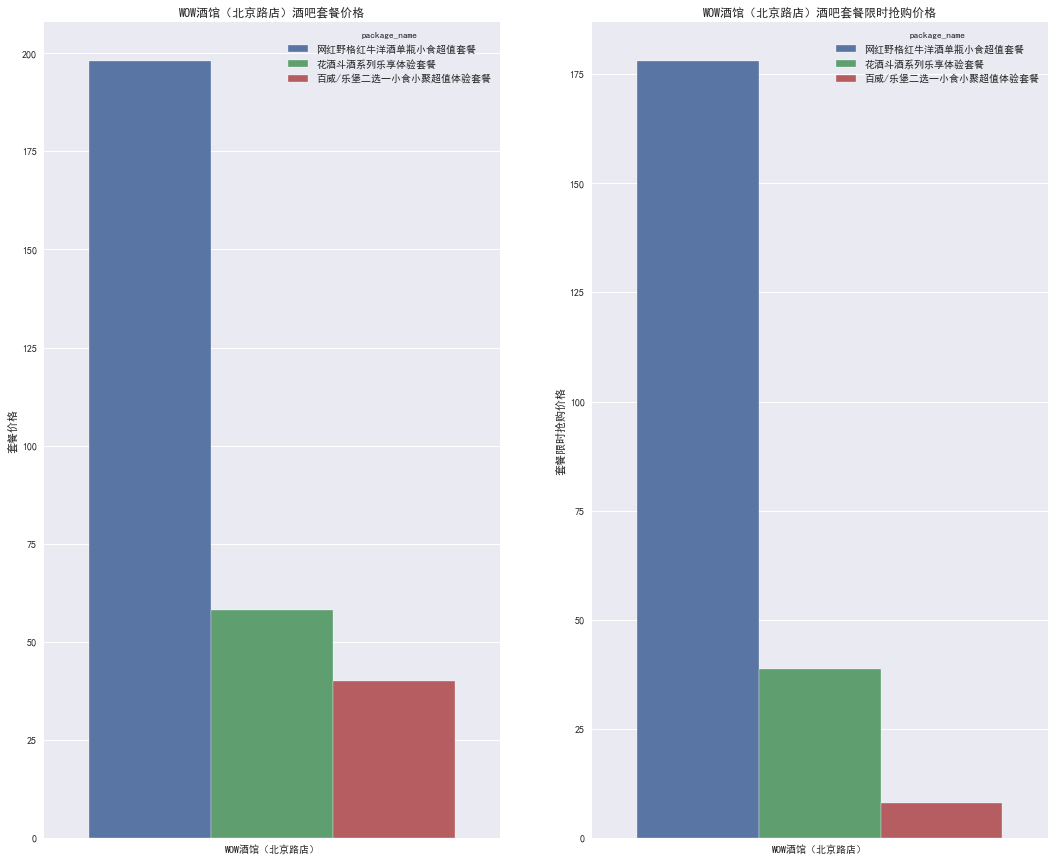

In [33]:
# 5、套餐价格 与 套餐限时抢购价 对比
bar_data['limit_price'] = bar_data['limit_price'].map(lambda x: 0 if isnan(x) else x)
# In[]:
bar_data_limit_price = bar_data[bar_data['limit_price'] != 0]
# In[]:
bar_group_limit_price_max = bar_data_limit_price.groupby(["bar_name", "package_name"], as_index=False)[['package_price','limit_price']].max()
# In[]:
fig, ax = plt.subplots(1,2,figsize=(18,20))
sns.barplot(x='bar_name', y='package_price', hue='package_name' ,data=bar_data_limit_price[bar_data_limit_price['bar_name']=='WOW酒馆（北京路店）'], ax=ax[0], ci=None, estimator=max,
            hue_order=bar_data_limit_price[bar_data_limit_price['bar_name']=='WOW酒馆（北京路店）'].groupby("package_name")['package_price'].max().sort_values(ascending=False).index
           )
ax[0].set_xlabel("")
ax[0].set_ylabel("套餐价格")
ax[0].set_title("WOW酒馆（北京路店）酒吧套餐价格")

sns.barplot(x='bar_name', y='limit_price', hue='package_name' ,data=bar_data_limit_price, ax=ax[1], ci=None, estimator=max,
            hue_order=bar_data_limit_price[bar_data_limit_price['bar_name']=='WOW酒馆（北京路店）'].groupby("package_name")['package_price'].max().sort_values(ascending=False).index
           )
ax[1].set_xlabel("")
ax[1].set_ylabel("套餐限时抢购价格")
ax[1].set_title("WOW酒馆（北京路店）酒吧套餐限时抢购价格")


In [27]:
# 6、酒吧时间段套餐价格变化
def package_price_change(data, package_names, bar_name):
    fig = plt.figure(figsize=(12,8))
    
    # 设置绘图风格
    plt.style.use('seaborn')
    
    # 设置中文编码和负号的正常显示
    plt.rcParams['font.sans-serif'] = 'SimHei'
    plt.rcParams['axes.unicode_minus'] = False
    
    for package in package_names:
        plt.plot(
                  data[data['package_name'] == package]['package_update_time'], # x轴数据
                  data[data['package_name'] == package]['package_price'], # y轴数据
                  marker = 'o', # 点的形状
                  markersize = 5, # 点的大小
                  # markerfacecolor='mediumpurple', # 点的填充色
                  label=package
                ) 
    
    
    # 添加标题和坐标轴标签
    plt.title(bar_name + "套餐价格时间区间变化情况")
    plt.xlabel('日期')
    plt.ylabel('套餐价格')
    
    fig.autofmt_xdate(rotation = 45)
    
    # 显示图例
    plt.legend(loc='upper right')
    # 显示图形
    plt.show() 

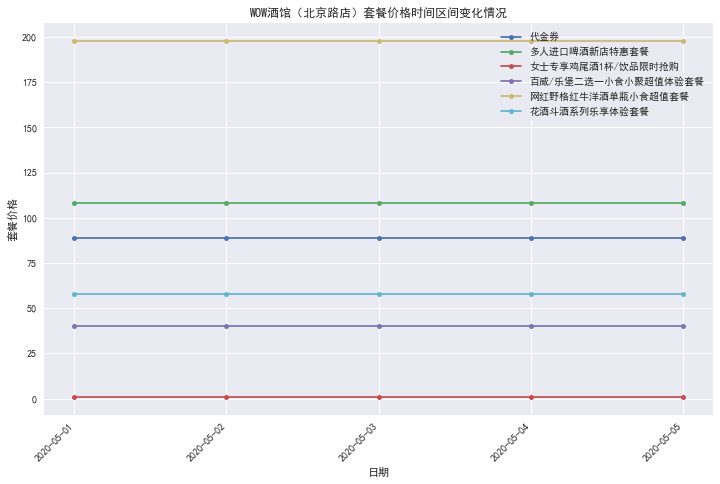

In [28]:
# 6.1、'WOW酒馆（北京路店）'
bar1 = bar_data[bar_data['bar_name'] == 'WOW酒馆（北京路店）'].groupby(["bar_name", "package_name", "package_update_time"], as_index=False)[['package_price','limit_price','market_price']].max()
# In[]:
bar1['package_update_time'] = bar1['package_update_time'].map(lambda x: x[:10])
# print(type(bar1.iloc[0]['package_update_time']))
# In[]:
package_price_change(bar1, ["代金券", "多人进口啤酒新店特惠套餐", "女士专享鸡尾酒1杯/饮品限时抢购", "百威/乐堡二选一小食小聚超值体验套餐", "网红野格红牛洋酒单瓶小食超值套餐", "花酒斗酒系列乐享体验套餐"], "WOW酒馆（北京路店）")

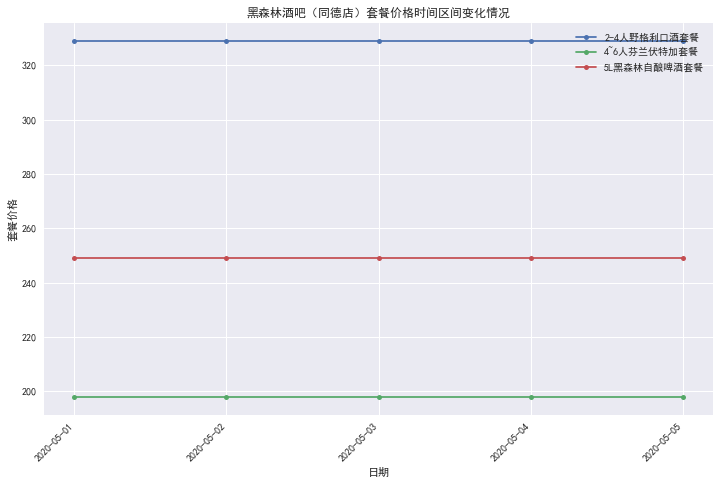

In [29]:
# In[]:
# 6.2、'黑森林酒吧（同德店）'
bar2 = bar_data[bar_data['bar_name'] == '黑森林酒吧（同德店）'].groupby(["bar_name", "package_name", "package_update_time"], as_index=False)[['package_price','limit_price','market_price']].max()
# In[]:
bar2['package_update_time'] = bar2['package_update_time'].map(lambda x: x[:10])
# In[]:
package_price_change(bar2, ["2-4人野格利口酒套餐", "4~6人芬兰伏特加套餐", "5L黑森林自酿啤酒套餐"], "黑森林酒吧（同德店）")

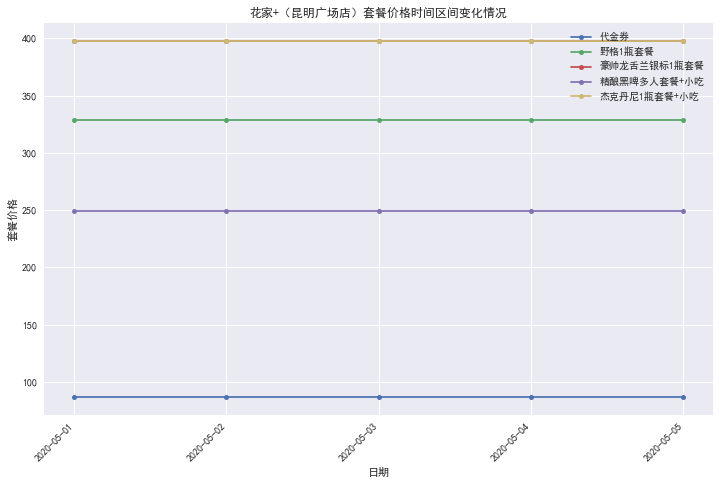

In [30]:
# In[]:
# 6.3、'花家+（昆明广场店）'
bar3 = bar_data[bar_data['bar_name'] == '花家+（昆明广场店）'].groupby(["bar_name", "package_name", "package_update_time"], as_index=False)[['package_price','limit_price','market_price']].max()
# In[]:
bar3['package_update_time'] = bar3['package_update_time'].map(lambda x: x[:10])
# In[]:
package_price_change(bar3, ["代金券", "野格1瓶套餐", "豪帅龙舌兰银标1瓶套餐", "精酿黑啤多人套餐+小吃", "杰克丹尼1瓶套餐+小吃"], "花家+（昆明广场店）")


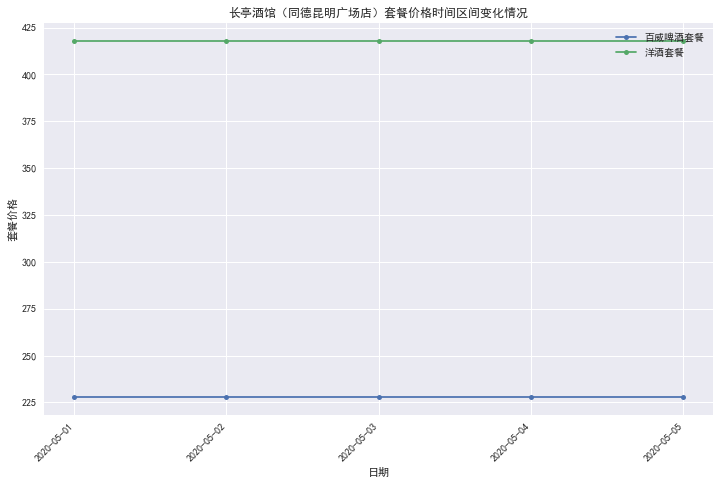

In [31]:
# In[]:
# 6.4、'长亭酒馆（同德昆明广场店）'
bar4 = bar_data[bar_data['bar_name'] == '长亭酒馆（同德昆明广场店）'].groupby(["bar_name", "package_name", "package_update_time"], as_index=False)[['package_price','limit_price','market_price']].max()
# In[]:
bar4['package_update_time'] = bar4['package_update_time'].map(lambda x: x[:10])
# In[]:
package_price_change(bar4, ["百威啤酒套餐", "洋酒套餐"], "长亭酒馆（同德昆明广场店）")